# Data Preparation 
The goal of this section is to preprocess data from different sources to be used for the training

In [1]:
from data_prepration import load_nested_dir

data_dir = 'data/handwritting_characters_database/curated'
images, labels = load_nested_dir(data_dir)

print(len(images))

62382


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0.] 117
u


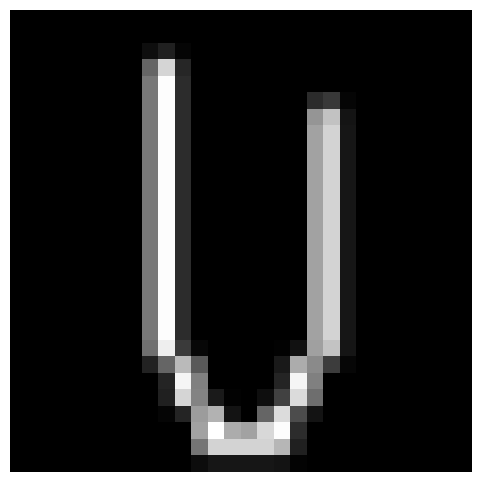

In [2]:
from util import show_image, one_hot_to_ascii
import numpy as np
random_image = 22500
index = np.argmax(labels[random_image])
print(labels[random_image], index)
char = one_hot_to_ascii(labels[random_image])
print(char)
show_image(images[random_image])


# Image Segmentation

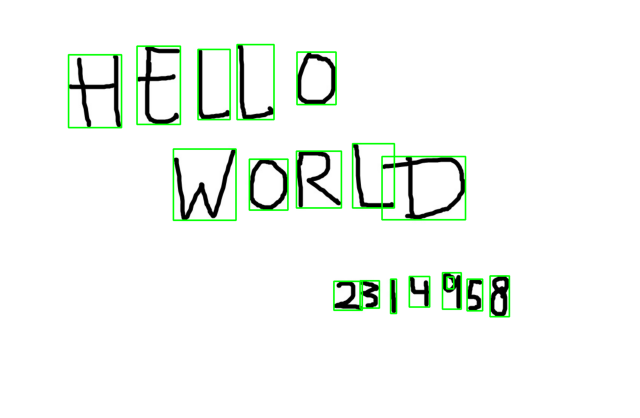

In [3]:
from segmentation import segment_image
from util import show_image

image , chars = segment_image("data/test_image_1.jpg")
show_image(image)

# Model Training

In [4]:
from model import build_deep_cnn_model

input_shape = (28, 28, 1)
num_classes = 127
model = build_deep_cnn_model(input_shape, num_classes)
model.summary()

/Users/shaza/Documents/Local Projects/Project 101/.conda/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 127)            │        16,383 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,495 (447.25 KB)

 Trainable params: 114,015 (445.37 KB)

 Non-trainable params: 480 (1.88 KB)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.3641 - loss: 2.6400 - val_accuracy: 0.7278 - val_loss: 0.8143
Epoch 2/10
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6930 - loss: 0.9582 - val_accuracy: 0.7783 - val_loss: 0.6351
Epoch 3/10
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7389 - loss: 0.7854 - val_accuracy: 0.7935 - val_loss: 0.5705
Epoch 4/10
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7614 - loss: 0.6892 - val_accuracy: 0.7994 - val_loss: 0.5496
Epoch 5/10
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7778 - loss: 0.6442 - val_accuracy: 0.8048 - val_loss: 0.5286
Epoch 6/10
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7865 - loss: 0.6104 - val_accuracy: 0.8133 - val_loss: 0.5064
Epoch 7/10
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.7941 - loss: 0.5820 - val_accuracy: 0.8204 - val_loss: 0.4821
Epoch 8/10
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7951 -

# Performace Visualization

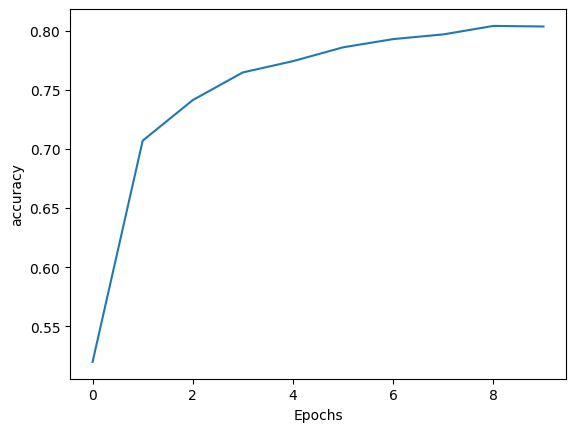

390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8342 - loss: 0.4670
accuracy:  82.76028037071228


In [6]:
from model import validate_model
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
    
plot_graphs(history, 'accuracy')

print("accuracy: " ,validate_model(model, X_val, y_val))

# Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[2.3130124e-09 1.7856812e-09 6.2182570e-10 8.7484819e-10 6.4263250e-10
  1.5822129e-09 2.1705681e-08 2.8936684e-09 5.2634057e-09 9.2843742e-09
  3.6249557e-09 9.9459996e-10 7.8701738e-09 5.4816427e-09 2.1523285e-09
  9.1141761e-10 1.3151025e-09 1.1896470e-09 1.8077960e-08 1.1838254e-09
  2.5888263e-09 1.7401688e-09 2.4126554e-09 2.1068134e-09 3.7684518e-09
  4.0366248e-09 5.4259495e-09 6.2961569e-09 3.5272056e-09 2.7337665e-09
  1.3710969e-09 5.6915113e-09 4.5189603e-09 1.4296094e-07 4.0759602e-08
  3.2549536e-07 2.6596997e-06 1.3840548e-05 7.7111156e-07 3.0871610e-07
  5.5255495e-10 3.8383972e-09 2.4574426e-06 8.8563397e-09 2.9423615e-09
  2.9897546e-07 2.1512432e-07 2.7458604e-08 2.2175922e-03 1.2194905e-09
  4.3871861e-08 9.4489465e-09 1.8286734e-08 1.0624861e-06 3.6928049e-07
  3.0514610e-08 2.9921348e-06 5.2537353e-06 7.3696310e-10 2.7279759e-08
  8.4409393e-08 2.0297647e-10 4.1634904e-09 2.0842045e-08 6.5787569e-02
  7.6039532e-06 8.0754765e

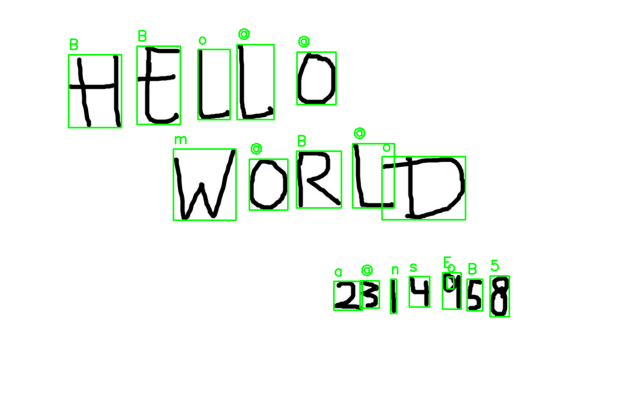

In [8]:
import cv2

image_with_predictions = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

for roi, (x, y, w, h) in chars:
    cv2.rectangle(image_with_predictions, (x, y), (x + w, y + h), (0, 255, 0), 2)
    prediction = model.predict(roi)
    print(prediction)
    label = one_hot_to_ascii(prediction)    
    cv2.putText(image_with_predictions, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image_with_predictions, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()